In [8]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import implementChannelLimit, read_csv_from_web
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit, validateChannelWidthLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# CMS 13TeV LHC

## `ttH > ee` CP-even [1911.04968](https://arxiv.org/abs/1911.04968)
We ignore potential `tH` and `tWH` contributions for a conservative limit. 

This limit has an intermediate region where there is no sensitivity, that's why we add the datapoints with huge limit values.

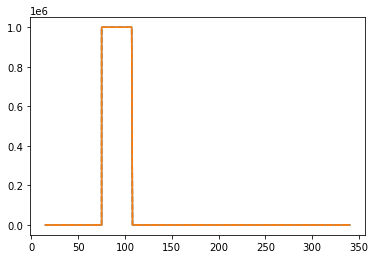

Looks good. Saving this to Htt_LHC13_CMS_137.json


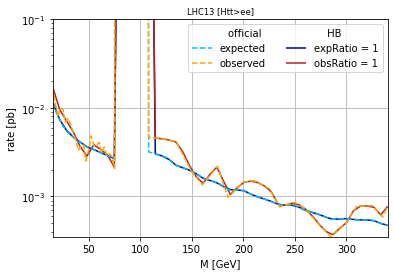

In [2]:
dfExp = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1764474/Figure%2012a/1/csv",
    comment="#",
    skiprows=55,
    skipfooter=149 - 101,
    engine="python",
    names=["m", "exp", "unc+", "unc-", "unc++", "unc--"],
)

df = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1764474/Figure%2012a/1/csv",
    comment="#",
    skiprows=8,
    skipfooter=149 - 54,
    engine="python",
    names=["m", "obs"],
)
assert np.allclose(df.m, dfExp.m)
df["exp"] = dfExp.exp
df = (
    df.append(
        pd.DataFrame(data={"m": [75.01, 107.09], "obs": 1e6, "exp": 1e6}),
        ignore_index=True,
    )
    .sort_values("m")
    .reset_index(drop=True)
)

process = {"channels": [["Htt", "ee"]]}
limitFile = implementChannelLimit(
    "1911.04968",
    process,
    "https://doi.org/10.17182/hepdata.91969.v1/t49",
    df,
    idSuffix=3,  # 1 and 2 are the mumu limits
    massResolution=resolution.mumu["light"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
ax.set_ylim(top=1e-1);


## `ttH > ee` CP-odd [1911.04968](https://arxiv.org/abs/1911.04968)
Same coments as the CP-even version

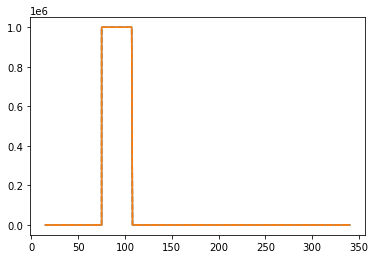

Looks good. Saving this to Att_LHC13_CMS_137.json


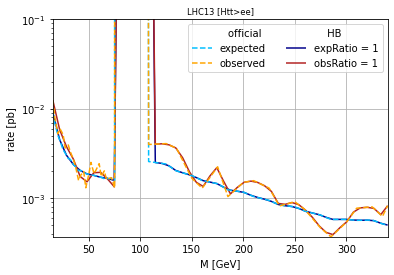

In [3]:
dfExp = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1764474/Figure%2012b/1/csv",
    comment="#",
    skiprows=55,
    skipfooter=149 - 101,
    engine="python",
    names=["m", "exp", "unc+", "unc-", "unc++", "unc--"],
)

df = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1764474/Figure%2012b/1/csv",
    comment="#",
    skiprows=8,
    skipfooter=149 - 54,
    engine="python",
    names=["m", "obs"],
)
assert np.allclose(df.m, dfExp.m)
df["exp"] = dfExp.exp
df = (
    df.append(
        pd.DataFrame(data={"m": [75.01, 107.09], "obs": 1e6, "exp": 1e6}),
        ignore_index=True,
    )
    .sort_values("m")
    .reset_index(drop=True)
)

process = {"channels": [["Htt", "ee"]]}
limitFile = implementChannelLimit(
    "1911.04968",
    process,
    "https://doi.org/10.17182/hepdata.91969.v1/t50",
    df,
    idSuffix=4, # 1 and 2 are the mumu limits
    prefix="Att",
    massResolution=resolution.mumu["light"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
ax.set_ylim(top=1e-1);


# CMS 8TeV LHC

## `hSM > ee` 8TeV combination [1410.6679](https://arxiv.org/abs/1410.6679)

Multiple different luminosity values: [19.7, 5.0] using 19.7 unless you set it manually


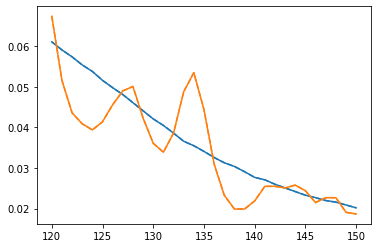

Looks good. Saving this to comb_LHC8_CMS_20.json


/home/jonasw/Projects/HB++/.venv/lib/python3.9/site-packages/Higgs/tools/LimitValidation.py:138: RuntimeWarning: divide by zero encountered in testAgainstChannelLimit (vectorized)
  expR, obsR = test(XX, YY)
/home/jonasw/Projects/HB++/.venv/lib/python3.9/site-packages/Higgs/tools/LimitValidation.py:138: RuntimeWarning: invalid value encountered in testAgainstChannelLimit (vectorized)
  expR, obsR = test(XX, YY)


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'LHC8 [vbfH,HW,H,HZ]>[ee]'}, xlabel='M [GeV]', ylabel='rate [pb]'>)

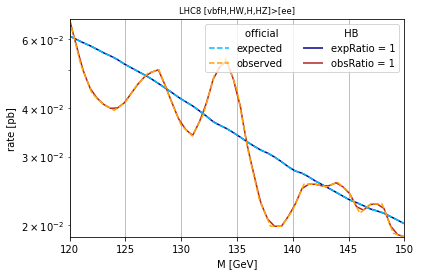

In [9]:
df = pd.DataFrame(
    data={
        "m": np.arange(120, 150.1, 1),
        "obs": [
            0.0674,
            0.0516,
            0.0436,
            0.0409,
            0.0394,
            0.0414,
            0.0456,
            0.049,
            0.0501,
            0.0423,
            0.0361,
            0.0339,
            0.0386,
            0.0488,
            0.0535,
            0.0444,
            0.031,
            0.0233,
            0.0199,
            0.0199,
            0.0219,
            0.0255,
            0.0255,
            0.0251,
            0.0258,
            0.0244,
            0.0215,
            0.0227,
            0.0227,
            0.0191,
            0.0187,
        ],
        "exp": [
            0.0611,
            0.0591,
            0.0574,
            0.0554,
            0.0538,
            0.0516,
            0.0498,
            0.0481,
            0.0461,
            0.0441,
            0.0421,
            0.0405,
            0.0386,
            0.0366,
            0.0355,
            0.0341,
            0.0326,
            0.0313,
            0.0304,
            0.0291,
            0.0277,
            0.0271,
            0.026,
            0.0251,
            0.0242,
            0.0233,
            0.0227,
            0.022,
            0.0216,
            0.0209,
            0.0202,
        ],
    }
)

process = {"channels": [["ggH", "ee"]]}
limitFile = implementChannelLimit(
    "1410.6679",
    {"channels": [[p, "ee"] for p in ["H", "vbfH", "HZ", "HW"]]},
    "Fig. 3b",
    df,
    idSuffix=2,  # 1 is mumu
    massResolution=resolution.mumu["light"],
    constraints={"modelLike": "SMHiggs", "process": "signal"},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
